## 2-Way Anova on SiteID

In [1]:
# load packages
import pandas as pd
import seaborn as sns

In [2]:
# load data file
df = pd.read_csv("Resources/NPX_data1_merged.csv")
df.head()

SampleID     O00533    O14786    O15031     O75015    O75023     O95445  \
0       A1  12.956143  3.729709  2.086122  11.609629  0.724192   8.542624   
1       A2  11.269477  6.144801  1.483985  17.582141  3.329488  10.395668   
2       A3  25.451070  6.950510  1.228214  10.494904  4.392219  14.669500   
3       A4  14.453038  3.725393  3.278853  14.969670  1.132330  16.194933   
4       A5   7.628712  7.198343  4.989030  13.087540  1.237068  15.074472   

      P00441    P00915    P01033  ...    Q0Z7S8    P98073    P01229    P53539  \
0   9.452978  7.795929  3.116308  ...  5.698748  1.640175  1.187713  3.843168   
1   7.704559  6.388902  0.793348  ...  5.751120  1.433037  2.068403  2.972200   
2  11.206255  1.333532  3.839500  ...  9.776941  2.514728  0.530500  0.803449   
3  12.066842 -0.580701  4.565457  ...  8.191348  4.953789  1.588413  1.929322   
4   2.201737  2.005555  4.600080  ...  5.697130  1.292394  1.370663  2.180779   

      P27797  P49763-3  Subject  Treatment    Site      Time  
0   1.278116  2.457126      ID1  Untreated  Site_D  Baseline  
1   4.908331  3.756646      ID1  Untreated  Site_D    Week.6  
2   5.720805  2.195161      ID1  Untreated  Site_D   Week.12  
3   6.883288  2.552394      ID2  Untreated  Site_C  Baseline  
4  13.823078  1.381204      ID2  Untreated  Site_C    Week.6  

[5 rows x 1109 columns]

In [3]:
# slice df by "Baseline" patients and remove extra column metadata
baseline_df = df.loc[df["Time"]=="Baseline"]
Sites_df = baseline_df.drop(["SampleID", "Subject", "Treatment", "Time"], axis=1)
Sites_df


O00533     O14786    O15031     O75015     O75023     O95445  \
0    12.956143   3.729709  2.086122  11.609629   0.724192   8.542624   
3    14.453038   3.725393  3.278853  14.969670   1.132330  16.194933   
6    12.730612  10.802000  1.187524   7.963439  -0.293644   6.786595   
9    12.258445   5.226161  3.325876   7.520732   7.384593  16.361272   
12    7.748904  11.580115  1.228873   6.120314   1.619912  12.977033   
15   11.431302  10.207661  3.311984  10.313994   3.526815  13.334769   
18    7.256171  10.815281  2.211937  -0.214706   4.026527  10.211327   
21   14.413956   4.499181  2.157865  11.475391   5.275544   8.329090   
24   10.202038   5.979814  3.677052   3.848114   2.602968  11.658940   
27   14.298536   9.245159  3.876550  17.613731   1.442955  19.111726   
30    8.997277   6.213137  4.177450  12.263095   2.457417  14.995332   
33   10.528312   4.866655  1.227530  16.844354   1.758191   4.203243   
36   12.495854   5.815314  1.898217  18.528696  -2.588527   9.891987   
39    6.154775  -0.980227  2.247543   8.084994   1.192260  11.039446   
42   13.239903   2.737570  1.469364   3.395995   5.755748   4.580889   
45   11.558847   6.218986  4.627789   7.843016   1.792212  15.382078   
48    9.486901   3.304467  2.757129  10.775502   4.633770   5.494407   
51   10.706560  10.242907  3.979089  12.678149   8.148608  12.584953   
54   13.903061   6.634164  1.831752  17.212303   4.184785  14.601944   
57   17.299621  10.621240  2.550432   4.858468   1.005220   4.954892   
60   12.419255   1.867392  3.264307  16.020007   5.701209   7.689616   
63   10.442908   5.457068  0.057610  15.354376   2.421279  14.478602   
66   13.682953   9.201907  2.864919   0.423135   0.792712  11.840858   
69    9.772788   2.786178  2.299371  12.287810   5.456999  12.442550   
72    4.468631  10.022910  1.951601  12.408631   2.317862   3.595111   
75   12.858324   5.419493  5.245306  -5.720613   3.445603  11.338499   
78    7.573612   2.522189  2.655571  15.020350   5.672701  14.499941   
81    2.957737  12.727727  2.915585   1.528397   6.944208   6.670873   
84   13.268125   3.540364  4.965877  16.466069   1.279578  14.371421   
87   11.120887   6.936210  2.741737  13.633082   7.493743  11.166161   
90   13.888386   3.697425  3.095572  13.735469   0.198667   7.382163   
93   15.180934   1.180343  2.766518   9.531212   3.875156  13.001026   
96    6.089132  -0.136763  2.911702  18.725323  13.131643  12.629904   
99    6.768384   8.414718  2.772149   4.482868  -2.833513  13.518468   
102   1.977572   4.552043  3.417100   5.719547   6.632924   7.210487   
105   5.908104   6.193610  2.009680  12.995574   3.414594   7.465169   
108   7.068134  10.889722  4.405968  17.259196   2.296665   5.844746   
111  13.395879   5.851235  2.406852  14.437240  -0.063553  12.282232   
114  12.171791   3.309556  3.912912  12.831897  10.403938  12.492255   
117   7.211764  11.408253  4.207630  15.136715   8.123650   6.838510   
120  13.796280   9.569685  2.110575  20.969224   5.458884   8.408252   
123  12.846341   5.738523  1.317449   0.501368   3.863417   7.748505   
126  11.180128   5.815551  4.737795   7.211828   3.816469   2.340093   
129   7.828671  11.964974  1.235886  12.990372   4.465924  11.372550   
132   6.736381  11.593985  3.063982   6.373021  10.947958  14.170318   
135  14.547350   6.070750  2.796786  12.907896   4.144247   6.309737   
138   8.697890   7.575899  1.514966   9.317123   4.065162  14.746227   
141   7.571515   7.310993  2.507049  16.791842   7.066656  10.642689   
144   6.762577   5.675694  3.146155  15.027108   2.692158  10.027684   
147   9.786214   6.321960  1.267119   3.550360   5.723461  10.315116   
150   1.961005   4.520364  4.933749   1.658025   4.319246  13.785119   
153   9.975178   8.553449  4.280947   9.935137  -1.353013  14.539348   

        P00441     P00915    P01033     P01034  ...     Q13308     P20472  \
0     9.452978   7.795929  3.116308  12.019284  ...   9.783882  11.378939   
3    12.066842  -0.580701  4.565457  

In [4]:
# create list of all Uniprot IDs to use in value_vars for stacked dataframe format
col_df = Sites_df.drop("Site", axis=1)
column_names = col_df.columns.tolist()
#column_names

In [5]:
# reshape the Sites_df dataframe suitable (stacked format) for statsmodels package 
Sites_df_melt = pd.melt(Sites_df, id_vars=['Site'], value_vars=column_names)
# replace column names
Sites_df_melt.columns = ['Site', 'UniprotID', 'NPX']
Sites_df_melt.dropna(inplace=True)
Sites_df_melt.head()
#Sites_df_melt.dtypes

Site UniprotID        NPX
0  Site_D    O00533  12.956143
1  Site_C    O00533  14.453038
2  Site_D    O00533  12.730612
3  Site_B    O00533  12.258445
4  Site_B    O00533   7.748904

In [6]:
# combine Site and UniprotID for one unique column for ANOVA testing
Sites_df_melt['UniqueID'] = Sites_df_melt['UniprotID'] + '_' + Sites_df_melt['Site']
Sites_df_melt.head()

#df1['state_and_code'] = df1['State'] + df1['State_code']
#print(df1)

Site UniprotID        NPX       UniqueID
0  Site_D    O00533  12.956143  O00533_Site_D
1  Site_C    O00533  14.453038  O00533_Site_C
2  Site_D    O00533  12.730612  O00533_Site_D
3  Site_B    O00533  12.258445  O00533_Site_B
4  Site_B    O00533   7.748904  O00533_Site_B

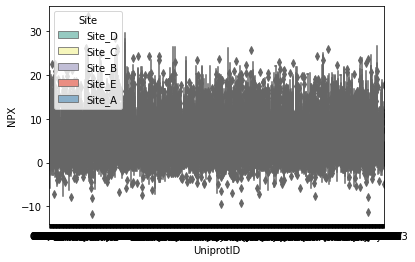

In [7]:
# generate a boxplot to see the data distribution by SiteID and protein. 
sns.boxplot(x="UniprotID", y="NPX", hue="Site", data=Sites_df_melt, palette="Set3")

In [8]:
# load packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model


In [9]:
# C(Site):C(Uniprot ID) represent interaction term
model = ols('NPX ~ C(UniqueID)', data=Sites_df_melt).fit()

# Type 3 sums of squares (SS) ('typ=3') is recommended for an unbalanced design for multifactorial ANOVA
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table



sum_sq       df          F    PR(>F)
Intercept        43.939710      1.0   4.511940  0.033664
C(UniqueID)  556157.497221   5519.0  10.347694  0.000000
Residual     505313.343777  51888.0        NaN       NaN

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
# C(Genotype):C(years) represent interaction term
model = ols('NPX ~ C(Site) + C(UniqueID) + C(Site):C(UniqueID)', data=Sites_df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

MemoryError: Unable to allocate 11.8 GiB for an array with shape (27600, 57408) and data type float64

In [11]:

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

data = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/ToothGrowth.csv'

df = pd.read_csv(data, index_col=0)
df.head()


len supp  dose
1   4.2   VC   0.5
2  11.5   VC   0.5
3   7.3   VC   0.5
4   5.8   VC   0.5
5   6.4   VC   0.5

In [12]:
# ANOVA
formula = 'len~C(supp)+C(dose)+C(supp):C(dose)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

sum_sq    df          F        PR(>F)
C(supp)           205.350000   1.0  15.571979  2.311828e-04
C(dose)          2426.434333   2.0  91.999965  4.046291e-18
C(supp):C(dose)   108.319000   2.0   4.106991  2.186027e-02
Residual          712.106000  54.0        NaN           NaN


In [18]:
# load data file
CAM_df = pd.read_csv("Resources/data1_CARDIOMETABOLIC.csv")
CAM_df

NPX Data        Unnamed: 1         Unnamed: 2  \
0                 Panel   CARDIOMETABOLIC    CARDIOMETABOLIC   
1                 Assay              CHL1               NRP1   
2            Uniprot ID            O00533             O14786   
3               OlinkID          OID01216           OID01217   
4                   NaN               NaN                NaN   
..                  ...               ...                ...   
163                 B78  12.8193632173862   6.10398500763625   
164                 B79   10.502865019702   8.93464138028839   
165                 NaN               NaN                NaN   
166                 LOD  2.36846658156787  0.156320288637653   
167  Missing Data freq.           0.01875            0.01875   

           Unnamed: 3        Unnamed: 4        Unnamed: 5        Unnamed: 6  \
0     CARDIOMETABOLIC   CARDIOMETABOLIC   CARDIOMETABOLIC   CARDIOMETABOLIC   
1              PLXNB2            FCGR3B            LILRB5              APOM   
2              O15031            O75015            O75023            O95445   
3            OID01218          OID01219          OID01220          OID01221   
4                 NaN               NaN               NaN               NaN   
..                ...               ...               ...               ...   
163  3.61861105798951  5.40553017924603  1.84224323629748  2.25882637772261   
164  3.10352376464103  15.2554177291889  2.72585763420006  11.3610163499738   
165               NaN               NaN               NaN               NaN   
166  0.26078096471901  3.54085630488519                 0  5.06516801877871   
167           0.01875            0.0875           0.09375           0.08125   

           Unnamed: 7        Unnamed: 8         Unnamed: 9  ...  \
0     CARDIOMETABOLIC   CARDIOMETABOLIC    CARDIOMETABOLIC  ...   
1                SOD1               CA1              TIMP1  ...   
2              P00441            P00915             P01033  ...   
3            OID01222          OID01223           OID01224  ...   
4                 NaN               NaN                NaN  ...   
..                ...               ...                ...  ...   
163  13.6831914634638  2.47475056941137   4.63751916194432  ...   
164  14.1166415391973  3.87092427945432  0.267595923332868  ...   
165               NaN               NaN                NaN  ...   
166  5.27948724131402                 0  0.659986157514092  ...   
167           0.06875            0.0875            0.04375  ...   

           Unnamed: 83       Unnamed: 84       Unnamed: 85       Unnamed: 86  \
0      CARDIOMETABOLIC   CARDIOMETABOLIC   CARDIOMETABOLIC   CARDIOMETABOLIC   
1                TIMD4             CNDP1              OSMR           C1QTNF1   
2               Q96H15            Q96KN2            Q99650            Q9BXJ1   
3             OID01298          OID01299          OID01300          OID01301   
4                  NaN               NaN               NaN               NaN   
..                 ...               ...               ...               ...   
163   7.04327594016238  3.83168736029607  1.10278915345999   6.8850236481174   
164   4.41630030360662   1.4267070536648  1.53858531434149  6.44224752433957   
165                NaN               NaN               NaN               NaN   
166  0.858770891876453                 0                 0                 0   
167              0.075           0.09375              0.05           0.05625   

          Unnamed: 87       Unnamed: 88       Unnamed: 89        Unnamed: 90  \
0     CARDIOMETABOLIC   CARDIOMETABOLIC   CARDIOMETABOLIC    CARDIOMETABOLIC   
1               CFHR5             MEGF9            CRTAC1              FETUB   
2              Q9BXR6            Q9H1U4            Q9NQ79             Q9UGM5   
3            OID01302          OID01303          OID01304           OID01305   
4                 NaN               NaN               NaN                NaN   
..                ...               ...            

In [20]:
#Drop unnecessary data rows
CAM_df = CAM_df.drop([0,2,3,166,167])
CAM_df = CAM_df.reset_index(drop=True)
CAM_df

NPX Data        Unnamed: 1        Unnamed: 2        Unnamed: 3  \
0      Assay              CHL1              NRP1            PLXNB2   
1        NaN               NaN               NaN               NaN   
2         A1  12.9561425886431  3.72970924582771  2.08612231436114   
3         A2   11.269476531342  6.14480091936497  1.48398497994593   
4         A3  25.4510701414362  6.95051017310168  1.22821356879884   
..       ...               ...               ...               ...   
158      B76  12.6518356746632  9.76799840102501  3.26223878260669   
159      B77  9.97517780474675    8.553448820892  4.28094686656499   
160      B78  12.8193632173862  6.10398500763625  3.61861105798951   
161      B79   10.502865019702  8.93464138028839  3.10352376464103   
162      NaN               NaN               NaN               NaN   

           Unnamed: 4         Unnamed: 5        Unnamed: 6        Unnamed: 7  \
0              FCGR3B             LILRB5              APOM              SOD1   
1                 NaN                NaN               NaN               NaN   
2     11.609629003747  0.724191555213795  8.54262355014331  9.45297817679369   
3    17.5821406034352   3.32948837750088   10.395667841802  7.70455946396273   
4    10.4949037688574   4.39221860100588  14.6695001836276  11.2062549289578   
..                ...                ...               ...               ...   
158  14.7461873166177   4.04067663489405  13.7396125997529  8.32408319546772   
159  9.93513677087097  -1.35301302249157  14.5393476138011  18.3088701027063   
160  5.40553017924603   1.84224323629748  2.25882637772261  13.6831914634638   
161  15.2554177291889   2.72585763420006  11.3610163499738  14.1166415391973   
162               NaN                NaN               NaN               NaN   

             Unnamed: 8         Unnamed: 9  ...       Unnamed: 83  \
0                   CA1              TIMP1  ...             TIMD4   
1                   NaN                NaN  ...               NaN   
2      7.79592944968609   3.11630846017245  ...  3.71816937654851   
3      6.38890244289185  0.793348184948415  ...  3.57672224634872   
4      1.33353206727508   3.83949966002527  ...  6.70757755606499   
..                  ...                ...  ...               ...   
158  -0.940497447387123   2.92041492563534  ...  9.37386702693026   
159    3.67194356763104   4.03637367327498  ...  9.60343893922326   
160    2.47475056941137   4.63751916194432  ...  7.04327594016238   
161    3.87092427945432  0.267595923332868  ...  4.41630030360662   
162                 NaN                NaN  ...               NaN   

            Unnamed: 84       Unnamed: 85       Unnamed: 86       Unnamed: 87  \
0                 CNDP1              OSMR           C1QTNF1             CFHR5   
1                   NaN               NaN               NaN               NaN   
2    0.0187281705949691  1.44420620203359  4.53879792575837  5.19986506461387   
3    -0.190461663583036  3.39801027892777  1.76910019495803  10.9106231605855   
4      1.15015139851804  2.90606938863575  3.97296475842837  3.87387089607663   
..                  ...               ...               ...               ...   
158  0.0733235934222338  2.48689714692831  5.26435487405169  8.05503474012463   
159    2.02389812498489  2.94645704487651  6.95182728077891  8.82831739284521   
160    3.83168736029607  1.10278915345999   6.8850236481174  9.23465777255801   
161     1.4267070536648  1.53858531434149  6.44224752433957  6.08197874141636   
162                 NaN               NaN               NaN               NaN   

           Unnamed: 88       Unnamed: 89       Unnamed: 90        Unnamed: 91  \
0                MEGF9            CRTAC1             FETUB            ANGPTL3   
1                  NaN               NaN               NaN                NaN   
2     1.73558169216479  8.11764000083775  3.51787177260598   9.47575616239197   
3     1.10119976932805  15.2472844432337  4.25823020499752   6.7080842021064

In [21]:
CAM_df.dropna()

NPX Data        Unnamed: 1        Unnamed: 2        Unnamed: 3  \
0      Assay              CHL1              NRP1            PLXNB2   
2         A1  12.9561425886431  3.72970924582771  2.08612231436114   
3         A2   11.269476531342  6.14480091936497  1.48398497994593   
4         A3  25.4510701414362  6.95051017310168  1.22821356879884   
5         A4  14.4530382024394  3.72539338198674  3.27885288239876   
..       ...               ...               ...               ...   
157      B75  13.0246883750201  3.91888614752226  3.16333408940248   
158      B76  12.6518356746632  9.76799840102501  3.26223878260669   
159      B77  9.97517780474675    8.553448820892  4.28094686656499   
160      B78  12.8193632173862  6.10398500763625  3.61861105798951   
161      B79   10.502865019702  8.93464138028839  3.10352376464103   

           Unnamed: 4         Unnamed: 5        Unnamed: 6        Unnamed: 7  \
0              FCGR3B             LILRB5              APOM              SOD1   
2     11.609629003747  0.724191555213795  8.54262355014331  9.45297817679369   
3    17.5821406034352   3.32948837750088   10.395667841802  7.70455946396273   
4    10.4949037688574   4.39221860100588  14.6695001836276  11.2062549289578   
5    14.9696702975272   1.13233004375712  16.1949334803935  12.0668416470563   
..                ...                ...               ...               ...   
157  11.9611309779728    1.3962645783265  7.35020259599792  19.3341729256044   
158  14.7461873166177   4.04067663489405  13.7396125997529  8.32408319546772   
159  9.93513677087097  -1.35301302249157  14.5393476138011  18.3088701027063   
160  5.40553017924603   1.84224323629748  2.25882637772261  13.6831914634638   
161  15.2554177291889   2.72585763420006  11.3610163499738  14.1166415391973   

             Unnamed: 8         Unnamed: 9  ...       Unnamed: 83  \
0                   CA1              TIMP1  ...             TIMD4   
2      7.79592944968609   3.11630846017245  ...  3.71816937654851   
3      6.38890244289185  0.793348184948415  ...  3.57672224634872   
4      1.33353206727508   3.83949966002527  ...  6.70757755606499   
5    -0.580701310147785    4.5654566520639  ...  5.91579034426145   
..                  ...                ...  ...               ...   
157    2.18302732509785   4.34826810550673  ...  5.34358710601775   
158  -0.940497447387123   2.92041492563534  ...  9.37386702693026   
159    3.67194356763104   4.03637367327498  ...  9.60343893922326   
160    2.47475056941137   4.63751916194432  ...  7.04327594016238   
161    3.87092427945432  0.267595923332868  ...  4.41630030360662   

            Unnamed: 84       Unnamed: 85       Unnamed: 86       Unnamed: 87  \
0                 CNDP1              OSMR           C1QTNF1             CFHR5   
2    0.0187281705949691  1.44420620203359  4.53879792575837  5.19986506461387   
3    -0.190461663583036  3.39801027892777  1.76910019495803  10.9106231605855   
4      1.15015139851804  2.90606938863575  3.97296475842837  3.87387089607663   
5      2.06293938619875  1.23455915596801  4.45155225947849  1.08678484807587   
..                  ...               ...               ...               ...   
157     1.0695319596694  4.42788373248489  5.64942576148057  6.54541293501696   
158  0.0733235934222338  2.48689714692831  5.26435487405169  8.05503474012463   
159    2.02389812498489  2.94645704487651  6.95182728077891  8.82831739284521   
160    3.83168736029607  1.10278915345999   6.8850236481174  9.23465777255801   
161     1.4267070536648  1.53858531434149  6.44224752433957  6.08197874141636   

           Unnamed: 88       Unnamed: 89         Unnamed: 90  \
0                MEGF9            CRTAC1               FETUB   
2     1.73558169216479  8.11764000083775    3.51787177260598   
3     1.10119976932805  15.2472844432337    4.25823020499752   
4     1.32524335433213  10.7768242786328    1.04065399627762   
5     2.48376511092367  11.8287586123149  -0.281426507048538   
..              

In [22]:
#Make new dataframe using Uniprot ID as headers
headers=CAM_df.iloc[0]
newCAM_df = pd.DataFrame(CAM_df.values[1:], columns=headers)
newCAM_df.columns

Index(['Assay', 'CHL1', 'NRP1', 'PLXNB2', 'FCGR3B', 'LILRB5', 'APOM', 'SOD1',
       'CA1', 'TIMP1', 'CST3', 'ANG', 'F11', 'PROC', 'SERPINA5', 'ICAM1',
       'REG1A', 'SERPINA7', 'C2', 'GP1BA', 'CA3', 'PRSS2', 'UMOD', 'MET', 'F7',
       'IGLC2', 'KIT', 'ITGAM', 'MBL2', 'FCGR2A', 'CDH1', 'CCL5', 'NCAM1',
       'CD59', 'SELL', 'NID1', 'CD46', 'ST6GAL1', 'IL7R', 'ENG', 'IGFBP3',
       'PAM', 'VCAM1', 'CR2', 'TCN2', 'TNXB', 'CA4', 'GNLY', 'CES1', 'IGFBP6',
       'TNC', 'DPP4', 'ICAM3', 'THBS4', 'SAA4', 'TIE1', 'COL18A1', 'PRCP',
       'NOTCH1', 'COMP', 'PLTP', 'CCL18', 'DEFA1', 'LCN2', 'TGFBR3', 'REG3A',
       'EFEMP1', 'FAP', 'PLA2G7', 'PTPRS', 'MFAP5', 'GAS6', 'SPARCL1', 'LTBP2',
       'PCOLCE', 'FCN2', 'TGFBI', 'CCL14', 'QPCT', 'AOC3', 'VASN', 'LILRB2',
       'LILRB1', 'TIMD4', 'CNDP1', 'OSMR', 'C1QTNF1', 'CFHR5', 'MEGF9',
       'CRTAC1', 'FETUB', 'ANGPTL3', 'LYVE1'],
      dtype='object', name=0)

In [23]:
#Rename and set the index to the Samples column
newCAM_df = newCAM_df.rename(columns={"Assay":"SampleID"})
newCAM_df = newCAM_df.set_index("SampleID")

In [26]:
newCAM_df = newCAM_df.dropna()

In [27]:
newCAM_df

0                     CHL1              NRP1            PLXNB2  \
SampleID                                                         
A1        12.9561425886431  3.72970924582771  2.08612231436114   
A2         11.269476531342  6.14480091936497  1.48398497994593   
A3        25.4510701414362  6.95051017310168  1.22821356879884   
A4        14.4530382024394  3.72539338198674  3.27885288239876   
A5         7.6287118351486  7.19834323864719  4.98902951047932   
...                    ...               ...               ...   
B75       13.0246883750201  3.91888614752226  3.16333408940248   
B76       12.6518356746632  9.76799840102501  3.26223878260669   
B77       9.97517780474675    8.553448820892  4.28094686656499   
B78       12.8193632173862  6.10398500763625  3.61861105798951   
B79        10.502865019702  8.93464138028839  3.10352376464103   

0                   FCGR3B             LILRB5              APOM  \
SampleID                                                          
A1         11.609629003747  0.724191555213795  8.54262355014331   
A2        17.5821406034352   3.32948837750088   10.395667841802   
A3        10.4949037688574   4.39221860100588  14.6695001836276   
A4        14.9696702975272   1.13233004375712  16.1949334803935   
A5        13.0875397817079   1.23706777415642  15.0744717382714   
...                    ...                ...               ...   
B75       11.9611309779728    1.3962645783265  7.35020259599792   
B76       14.7461873166177   4.04067663489405  13.7396125997529   
B77       9.93513677087097  -1.35301302249157  14.5393476138011   
B78       5.40553017924603   1.84224323629748  2.25882637772261   
B79       15.2554177291889   2.72585763420006  11.3610163499738   

0                     SOD1                 CA1              TIMP1  \
SampleID                                                            
A1        9.45297817679369    7.79592944968609   3.11630846017245   
A2        7.70455946396273    6.38890244289185  0.793348184948415   
A3        11.2062549289578    1.33353206727508   3.83949966002527   
A4        12.0668416470563  -0.580701310147785    4.5654566520639   
A5        2.20173662660043    2.00555536576828   4.60007966170468   
...                    ...                 ...                ...   
B75       19.3341729256044    2.18302732509785   4.34826810550673   
B76       8.32408319546772  -0.940497447387123   2.92041492563534   
B77       18.3088701027063    3.67194356763104   4.03637367327498   
B78       13.6831914634638    2.47475056941137   4.63751916194432   
B79       14.1166415391973    3.87092427945432  0.267595923332868   

0                     CST3  ...             TIMD4               CNDP1  \
SampleID                    ...                                         
A1        12.0192837065877  ...  3.71816937654851  0.0187281705949691   
A2        12.0865638772341  ...  3.57672224634872  -0.190461663583036   
A3        13.7618935545456  ...  6.70757755606499    1.15015139851804   
A4        10.0299110551015  ...  5.91579034426145    2.06293938619875   
A5        10.5679727320146  ...   5.1708237580765    1.66230089949616   
...                    ...  ...               ...                 ...   
B75       9.87219311927669  ...  5.34358710601775     1.0695319596694   
B76       7.52111967520455  ...  9.37386702693026  0.0733235934222338   
B77       7.54536784767549  ...  9.60343893922326    2.02389812498489   
B78       10.2330560515666  ...  7.04327594016238    3.83168736029607   
B79       14.5451026150584  ...  4.41630030360662     1.4267070536648   

0                     OSMR           C1QTNF1             CFHR5  \
SampleID                                                         
A1        1.44420620203359  4.53879792575837  5.19986506461387   
A2        3.39801027892777  1.76910019495803  10.9106231605855   
A3        2.90606938863575  3.97296475842837  3.87387089607663   
A4        1.23455915596801  4.45155225947849  1.08678484807587   
A5        1.6492615824900

In [34]:
#Read sample info data excel to dataframe
info_df = pd.read_excel("NPX_data1_info.xlsx")
info_df.head()

SampleID Subject  Treatment    Site      Time   Project
0       A1     ID1  Untreated  Site_D  Baseline  20200001
1       A2     ID1  Untreated  Site_D    Week.6  20200001
2       A3     ID1  Untreated  Site_D   Week.12  20200001
3       A4     ID2  Untreated  Site_C  Baseline  20200001
4       A5     ID2  Untreated  Site_C    Week.6  20200001

In [35]:
#Merge dataframes together on SampleID
CAMmerged_df = newCAM_df.merge(info_df, on="SampleID", how="inner")
CAMmerged_df

SampleID              CHL1              NRP1            PLXNB2  \
0         A1  12.9561425886431  3.72970924582771  2.08612231436114   
1         A2   11.269476531342  6.14480091936497  1.48398497994593   
2         A3  25.4510701414362  6.95051017310168  1.22821356879884   
3         A4  14.4530382024394  3.72539338198674  3.27885288239876   
4         A5   7.6287118351486  7.19834323864719  4.98902951047932   
..       ...               ...               ...               ...   
151      B75  13.0246883750201  3.91888614752226  3.16333408940248   
152      B76  12.6518356746632  9.76799840102501  3.26223878260669   
153      B77  9.97517780474675    8.553448820892  4.28094686656499   
154      B78  12.8193632173862  6.10398500763625  3.61861105798951   
155      B79   10.502865019702  8.93464138028839  3.10352376464103   

               FCGR3B             LILRB5              APOM              SOD1  \
0     11.609629003747  0.724191555213795  8.54262355014331  9.45297817679369   
1    17.5821406034352   3.32948837750088   10.395667841802  7.70455946396273   
2    10.4949037688574   4.39221860100588  14.6695001836276  11.2062549289578   
3    14.9696702975272   1.13233004375712  16.1949334803935  12.0668416470563   
4    13.0875397817079   1.23706777415642  15.0744717382714  2.20173662660043   
..                ...                ...               ...               ...   
151  11.9611309779728    1.3962645783265  7.35020259599792  19.3341729256044   
152  14.7461873166177   4.04067663489405  13.7396125997529  8.32408319546772   
153  9.93513677087097  -1.35301302249157  14.5393476138011  18.3088701027063   
154  5.40553017924603   1.84224323629748  2.25882637772261  13.6831914634638   
155  15.2554177291889   2.72585763420006  11.3610163499738  14.1166415391973   

                    CA1              TIMP1  ...              MEGF9  \
0      7.79592944968609   3.11630846017245  ...   1.73558169216479   
1      6.38890244289185  0.793348184948415  ...   1.10119976932805   
2      1.33353206727508   3.83949966002527  ...   1.32524335433213   
3    -0.580701310147785    4.5654566520639  ...   2.48376511092367   
4      2.00555536576828   4.60007966170468  ...   2.25341754226301   
..                  ...                ...  ...                ...   
151    2.18302732509785   4.34826810550673  ...  0.642493625884763   
152  -0.940497447387123   2.92041492563534  ...   1.27438906688114   
153    3.67194356763104   4.03637367327498  ...  0.789020654652515   
154    2.47475056941137   4.63751916194432  ...   1.17793269102686   
155    3.87092427945432  0.267595923332868  ...   1.48936495375005   

               CRTAC1               FETUB            ANGPTL3  \
0    8.11764000083775    3.51787177260598   9.47575616239197   
1    15.2472844432337    4.25823020499752   6.70808420210647   
2    10.7768242786328    1.04065399627762  -1.10355336937128   
3    11.8287586123149  -0.281426507048538   8.50487820936694   
4    10.9337961807956    1.77405712675233   6.68917741049247   
..                ...                 ...                ...   
151  7.75973012088635    5.17961719754872   2.62542355124859   
152   6.2693815129083    4.14477149517934   6.40080802523392   
153  8.08156725248989    1.65743006136007   4.22904544237937   
154   10.478475238057    4.98405810418861    5.6940866032053   
155  4.15943520984801    5.50579810033911   8.06379093027342   

                 LYVE1 Subject  Treatment    Site      Time   Project  
0     5.86528636644432     ID1  Untreated  Site_D  Baseline  20200001  
1     6.12303218291332     ID1  Untreated  Site_D    Week.6  20200001  
2     10.1001040541713     ID1  Untreated  Site_D   Week.12  20200001  
3     9.82250486412069     ID2  Untreated  Site_C  Baseline  20200001  
4     6.68180487131249     ID2  Untreated  Site_C    Week.6  20200001  
..                 ...     ...        ...     ...       ...       ...  
151   3.56923103998509    ID51  Untreated  Site_A    Week.6  20200001  
152   7.82615026

In [36]:
# slice df by "Baseline" patients and remove extra column metadata
CAMmerged_df = CAMmerged_df.loc[CAMmerged_df["Treatment"]=="Treated"]
CAM_A_df = CAMmerged_df.drop(["SampleID", "Subject", "Site", "Project"], axis=1)
CAM_A_df

CHL1              NRP1               PLXNB2  \
15   11.4313024239114  10.2076614036334     3.31198379902086   
16   9.74553137294813  3.23466078994712     3.78013509055336   
17   10.6312949377392  8.80855103200014     3.74006721382437   
21   14.4139563917113  4.49918094915806     2.15786499911675   
22   16.7108247864901  6.56380325594752     1.88556430519053   
..                ...               ...                  ...   
148  5.88234603724356  11.3882247237607   -0.599871704941926   
149  7.50698291417781  9.41336125889819  -0.0369891424153348   
153  9.97517780474675    8.553448820892     4.28094686656499   
154  12.8193632173862  6.10398500763625     3.61861105798951   
155   10.502865019702  8.93464138028839     3.10352376464103   

               FCGR3B             LILRB5              APOM              SOD1  \
15   10.3139939304682   3.52681494622786  13.3347694233113  10.6614145516586   
16    4.8262433722667    1.8865900119105  15.8294644347986  7.64110305330834   
17   20.9197955695983  0.853839006072356  5.58925789039364  10.2564338061515   
21   11.4753907390275    5.2755436636104  8.32909033550076  9.41502470975204   
22   11.2410447602792   4.88596435062275  6.20142652428376   8.9900087922645   
..                ...                ...               ...               ...   
148  1.77542141849682   7.61180101664898  13.1482134682808  9.30441431018859   
149  9.88175505042778   6.48493282254507  8.10524077093451  14.9107044713361   
153  9.93513677087097  -1.35301302249157  14.5393476138011  18.3088701027063   
154  5.40553017924603   1.84224323629748  2.25882637772261  13.6831914634638   
155  15.2554177291889   2.72585763420006  11.3610163499738  14.1166415391973   

                  CA1              TIMP1              CST3  ...  \
15   3.45464801346906   4.78819623791636  9.26830187911402  ...   
16   6.84214529506524   6.77503756399463  10.6277099817294  ...   
17   6.05464108825421   5.18914950602324  14.0016735490019  ...   
21   4.35593618956263   1.82144753151979  3.86231888709995  ...   
22   6.09866942691817   3.70367489700177  7.62352893171915  ...   
..                ...                ...               ...  ...   
148  2.11036243717021   5.60271009958046  7.58752328748112  ...   
149  1.08045380350274   4.79536758331429  11.8032927497913  ...   
153  3.67194356763104   4.03637367327498  7.54536784767549  ...   
154  2.47475056941137   4.63751916194432  10.2330560515666  ...   
155  3.87092427945432  0.267595923332868  14.5451026150584  ...   

                 OSMR            C1QTNF1             CFHR5              MEGF9  \
15   5.63912468745129   6.30466519313054  4.53452948256125   2.77770766373806   
16   3.01657467692417   6.91930053837173  5.20992373902832   1.32585029541587   
17    4.3444117365585   6.02574403736664  5.65972654783626  0.933522441445924   
21   2.69525613661945   1.35258722683646  5.16182308535327   1.22023652480382   
22   3.07043582536245  -2.05984278129979  4.53003694021015  0.937995427160828   
..                ...                ...               ...                ...   
148  2.45134999298749   1.65487204244799  7.52598256703746    2.0243458416124   
149  4.83062165896371   3.75284095193243  2.64936718841287    2.1898891592832   
153  2.94645704487651   6.95182728077891  8.82831739284521  0.789020654652515   
154  1.10278915345999    6.8850236481174  9.23465777255801   1.17793269102686   
155  1.53858531434149   6.44224752433957  6.08197874141636   1.48936495375005   

               CRTAC1             FETUB           ANGPTL3              LYVE1  \
15   15.8791333058737  0.49124764829998  16.2196006275706   6.58547038275717   
16   11.5649959744136   3.7717668123361   11.452014022262   16.5010397801217   
17   10.2048903212704  3.94747472281602  16.1718412906971   9.48612376261263   
21   9.72997172457298  3.90192301697926  8.34799592039863   6.33151200993282   
22   5.25639401129613  4.55586239924871  13.8591178315085   3.10124250382333   
..                ...        